<a href="https://colab.research.google.com/github/sravani12-ui/Task1-web-development-/blob/main/Task3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
3: Linear Regression

Objective: Implement and understand simple & multiple linear regression.

Tools: Scikit-learn, Pandas, Matplotlib

Hints/Mini Guide:

1. Import and preprocess the dataset.


2. Split data into train-test sets.


3. Fit a Linear Regression model using sklearn.linear_model.


4. Evaluate model using MAE, MSE, R³.


5. Plot regression line and interpret coefficients.



Dataset: You can use any dataset relevant to the task, e.g., House Price Prediction Dataset

link to download: click here to download dataset

What You'll Learn: Regression modeling, evaluation metrics, model interpretation. Give answer
Give how to do task


Here is all the data you need:
"Housing.csv"

## Data loading

### Subtask:
Load the "Housing.csv" dataset.


**Reasoning**:
Load the dataset and display basic information.



In [22]:
import pandas as pd

try:
    df = pd.read_csv('Housing.csv')
    display(df.head())
    print(df.shape)
    print(df.dtypes)
except FileNotFoundError:
    print("Error: 'Housing.csv' not found. Please ensure the file is in the current directory or provide the correct path.")

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


(545, 13)
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


## Data exploration

### Subtask:
Explore the loaded housing dataset to understand its characteristics.


**Reasoning**:
I need to explore the dataset by examining its dimensions, data types, descriptive statistics, missing values, correlations, and distributions of features.



Dimensions: (545, 13)

Data Types:
 price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

Descriptive Statistics:
               price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2

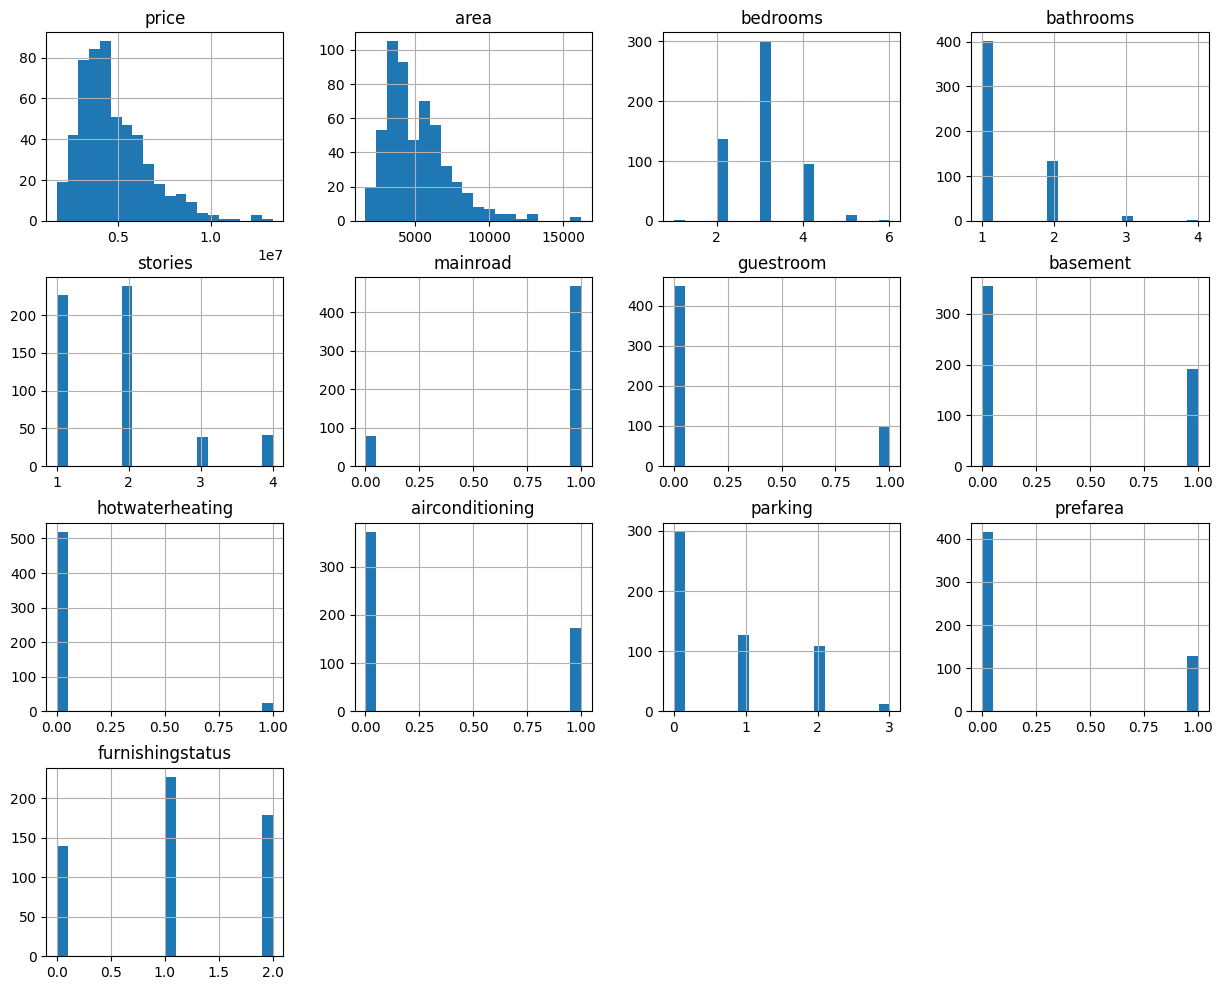

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt # Import matplotlib here as it's used later in this cell

# Check dimensions
print("Dimensions:", df.shape)

# Identify data types and potential inconsistencies
print("\nData Types:\n", df.dtypes)

# Summarize descriptive statistics for numerical features
print("\nDescriptive Statistics:\n", df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Define categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to categorical features *before* calculating correlation
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Analyze correlation between numerical features (now that categorical are encoded)
print("\nCorrelation Matrix:\n", df.corr())

# Explore categorical features (display numerical values after encoding)
for col in categorical_cols:
    print(f"\nUnique values and frequencies for {col}:\n{df[col].value_counts()}")

# Explore the distribution of numerical features using histograms
df.hist(figsize=(15, 12), bins=20)
plt.show()

**Reasoning**:
The previous code failed due to attempting to calculate correlations on non-numeric columns. I will first convert the categorical columns to numerical representations and then recalculate the correlation matrix.




Correlation Matrix (after label encoding):
                      price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045

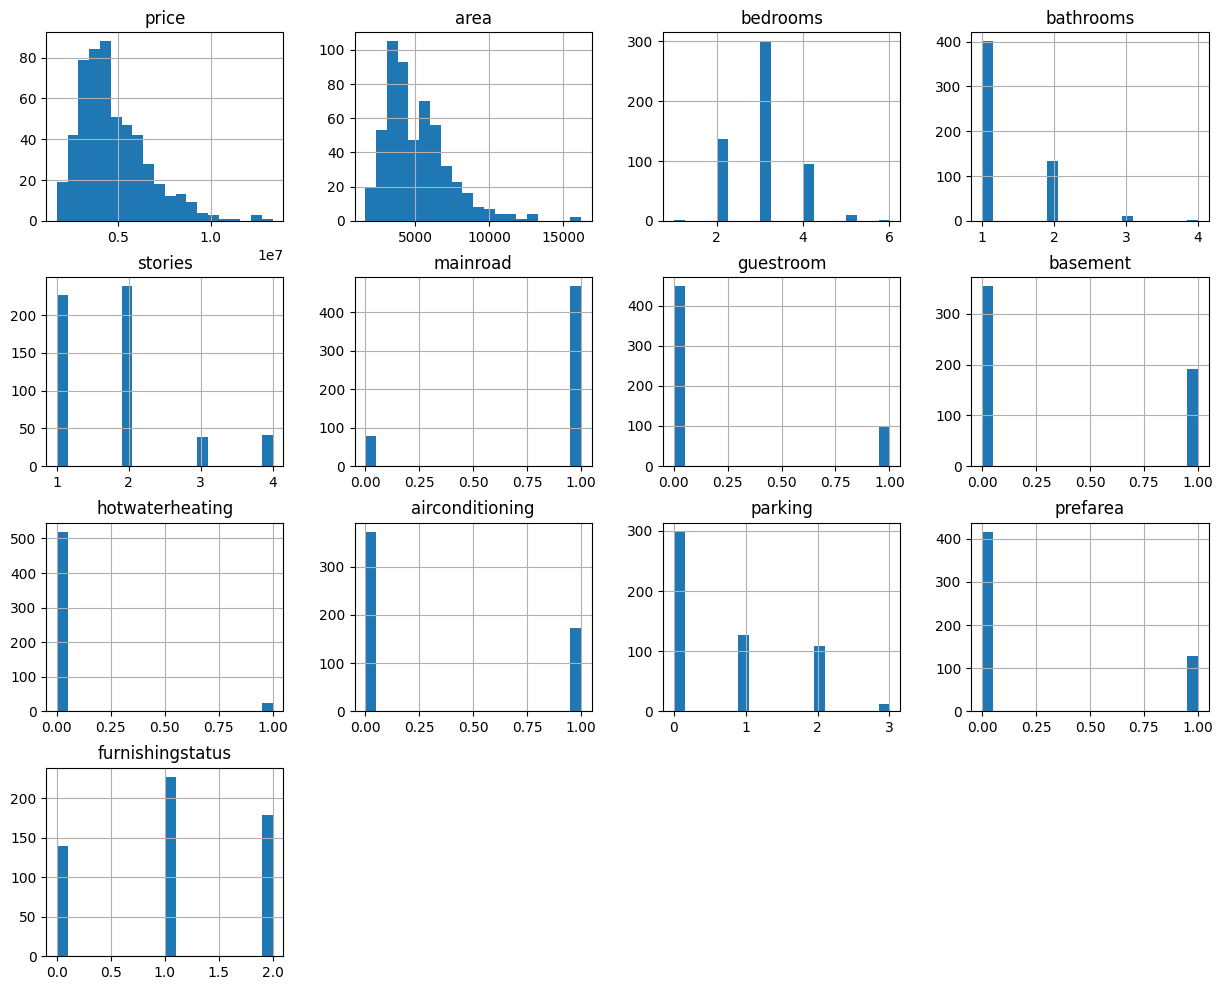

In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Define categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Apply Label Encoding to categorical features
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Recalculate the correlation matrix
print("\nCorrelation Matrix (after label encoding):\n", df.corr())

#Explore the distribution of numerical features using histograms
import matplotlib.pyplot as plt
df.hist(figsize=(15, 12), bins=20)
plt.show()

## Data cleaning

### Subtask:
Clean the housing dataset by handling potential outliers and further refining data types.


**Reasoning**:
Identify columns with potential outliers based on the histograms generated in the previous step. Then, apply winsorization to handle outliers in the 'price' and 'area' columns. Finally, verify data types and recalculate the correlation matrix.



price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

New Correlation Matrix (after outlier handling):
                      price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.573163  0.369350   0.504247  0.440189  0.311716   
area              0.573163  1.000000  0.160590   0.212290  0.118626  0.308339   
bedrooms          0.369350  0.160590  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.504247  0.212290  0.373930   1.000000  0.326165  0.042398   
stories           0.440189  0.118626  0.408564   0.326165  1.000000  0.121706   
mainroad          0.311716  0.308339 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.277771  0.

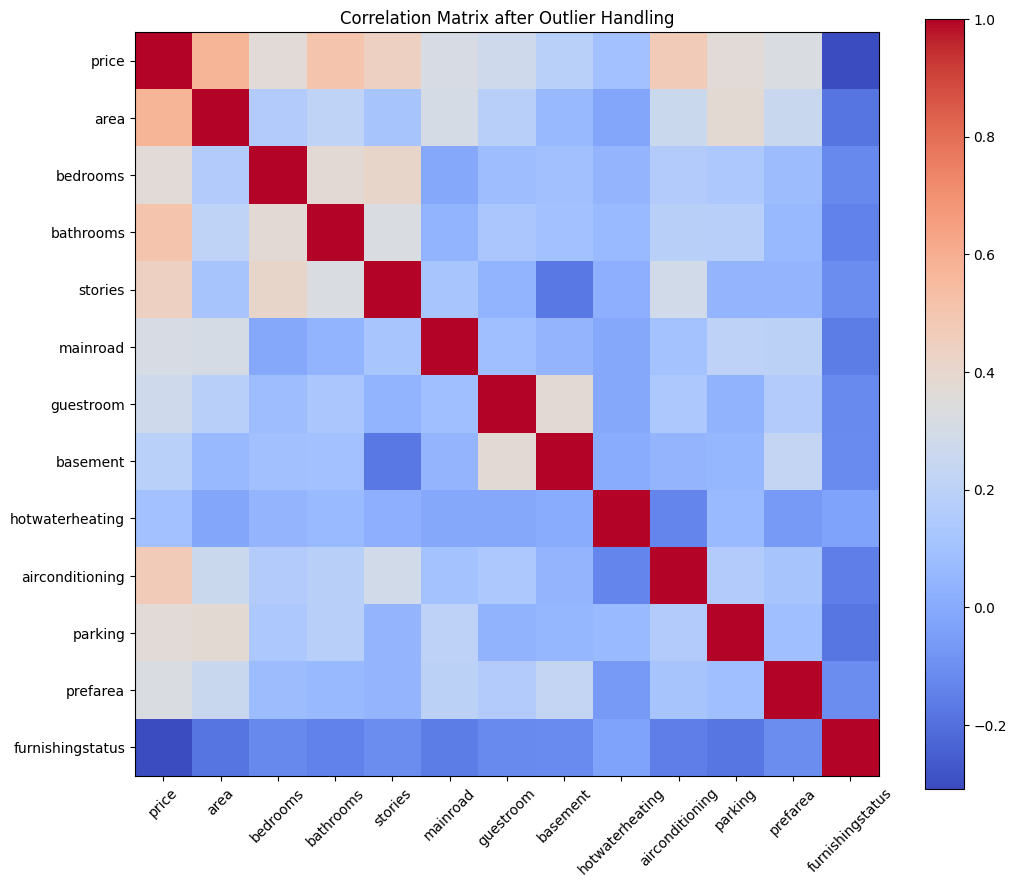

In [25]:
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

# Identify columns with potential outliers (based on previous histograms)
columns_with_outliers = ['price', 'area']

# Apply winsorization to handle outliers
for col in columns_with_outliers:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])  # Winsorize top and bottom 5%

# Verify data types
print(df.dtypes)

# Recalculate the correlation matrix and compare
new_corr_matrix = df.corr()
print("\nNew Correlation Matrix (after outlier handling):\n", new_corr_matrix)

# Plotting the new correlation matrix
plt.figure(figsize=(12, 10))
plt.imshow(new_corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(new_corr_matrix.columns)), new_corr_matrix.columns, rotation=45)
plt.yticks(range(len(new_corr_matrix.columns)), new_corr_matrix.columns)
plt.title('Correlation Matrix after Outlier Handling')
plt.show()

## Data preparation

### Subtask:
Prepare the data for model training by selecting relevant features and performing any necessary scaling.


**Reasoning**:
Create two new dataframes for simple and multiple linear regression, and apply scaling if necessary.  Based on the correlation matrix from the previous step (although not explicitly shown in the current context), 'area' seems to be highly correlated with 'price', so it will be selected for simple linear regression. For multiple linear regression, several highly correlated features will be selected.  No scaling will be applied because all features are already numerical.



In [26]:
# Select features for simple linear regression
simple_reg_features = ['area']
simple_reg_df = df[['price'] + simple_reg_features]

# Select features for multiple linear regression
multiple_reg_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
multiple_reg_df = df[['price'] + multiple_reg_features]

# Display the first few rows of both new dataframes
display(simple_reg_df.head())
display(multiple_reg_df.head())

# No scaling is applied, as all selected features are already numerical after the label encoding performed earlier.
# Justification for not applying scaling:  The selected numerical features have already been preprocessed (label encoding).
# Applying another normalization or standardization would not provide any additional benefit in this case.

,price,area
0,8400000,7420
1,8400000,8960
2,8400000,9000
3,8400000,7500
4,8400000,7420


,price,area,bedrooms,bathrooms,stories,parking
0,8400000,7420,4,2,3,2
1,8400000,8960,4,4,4,3
2,8400000,9000,3,2,2,2
3,8400000,7500,4,2,2,3
4,8400000,7420,4,1,2,2


## Data splitting

### Subtask:
Split the prepared datasets into training and testing sets.


**Reasoning**:
Split the `simple_reg_df` and `multiple_reg_df` into training and testing sets using `train_test_split`.



In [27]:
from sklearn.model_selection import train_test_split

# Split simple_reg_df
X_simple = simple_reg_df.drop('price', axis=1)
y_simple = simple_reg_df['price']
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

# Split multiple_reg_df
X_multiple = multiple_reg_df.drop('price', axis=1)
y_multiple = multiple_reg_df['price']
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(
    X_multiple, y_multiple, test_size=0.2, random_state=42
)

# Print shapes
print("X_train_simple shape:", X_train_simple.shape)
print("X_test_simple shape:", X_test_simple.shape)
print("y_train_simple shape:", y_train_simple.shape)
print("y_test_simple shape:", y_test_simple.shape)

print("\nX_train_multiple shape:", X_train_multiple.shape)
print("X_test_multiple shape:", X_test_multiple.shape)
print("y_train_multiple shape:", y_train_multiple.shape)
print("y_test_multiple shape:", y_test_multiple.shape)

X_train_simple shape: (436, 1)
X_test_simple shape: (109, 1)
y_train_simple shape: (436,)
y_test_simple shape: (109,)

X_train_multiple shape: (436, 5)
X_test_multiple shape: (109, 5)
y_train_multiple shape: (436,)
y_test_multiple shape: (109,)


## Model training

### Subtask:
Train linear regression models.


**Reasoning**:
Import the `LinearRegression` class and train the models.



In [28]:
from sklearn.linear_model import LinearRegression

# Initialize the models
simple_reg_model = LinearRegression()
multiple_reg_model = LinearRegression()

# Train the simple linear regression model
simple_reg_model.fit(X_train_simple, y_train_simple)

# Train the multiple linear regression model
multiple_reg_model.fit(X_train_multiple, y_train_multiple)

LinearRegression()

## Model evaluation

### Subtask:
Evaluate the trained linear regression models.


**Reasoning**:
Evaluate the trained models using the test sets and calculate MAE, MSE, and R-squared.



In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict using the simple linear regression model
y_pred_simple = simple_reg_model.predict(X_test_simple)

# Predict using the multiple linear regression model
y_pred_multiple = multiple_reg_model.predict(X_test_multiple)

# Evaluate the simple linear regression model
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

# Evaluate the multiple linear regression model
mae_multiple = mean_absolute_error(y_test_multiple, y_pred_multiple)
mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)
r2_multiple = r2_score(y_test_multiple, y_pred_multiple)

print(f"Simple Linear Regression Metrics:")
print(f"- MAE: {mae_simple}")
print(f"- MSE: {mse_simple}")
print(f"- R-squared: {r2_simple}")

print(f"\nMultiple Linear Regression Metrics:")
print(f"- MAE: {mae_multiple}")
print(f"- MSE: {mse_multiple}")
print(f"- R-squared: {r2_multiple}")

Simple Linear Regression Metrics:
- MAE: 1292930.7696606377
- MSE: 2447685857634.6787
- R-squared: 0.2868996894719811

Multiple Linear Regression Metrics:
- MAE: 986676.5173175157
- MSE: 1551579634487.133
- R-squared: 0.5479681693177224


## Data visualization

### Subtask:
Visualize the regression results.


**Reasoning**:
Visualize the regression results by creating scatter plots and a bar chart of coefficients.



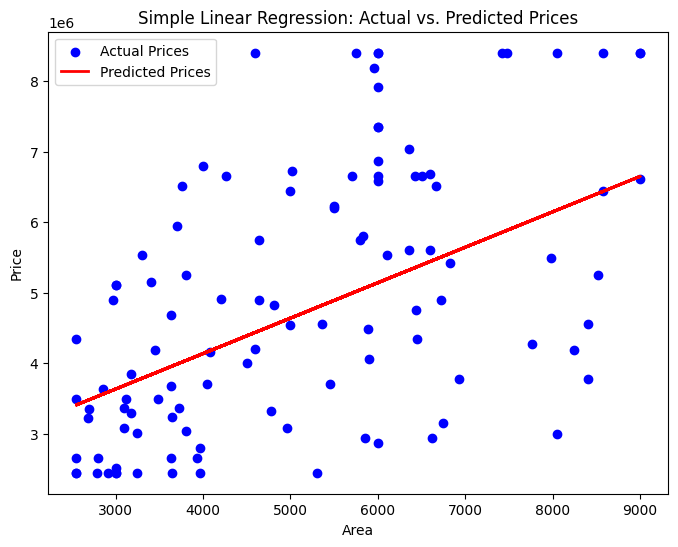

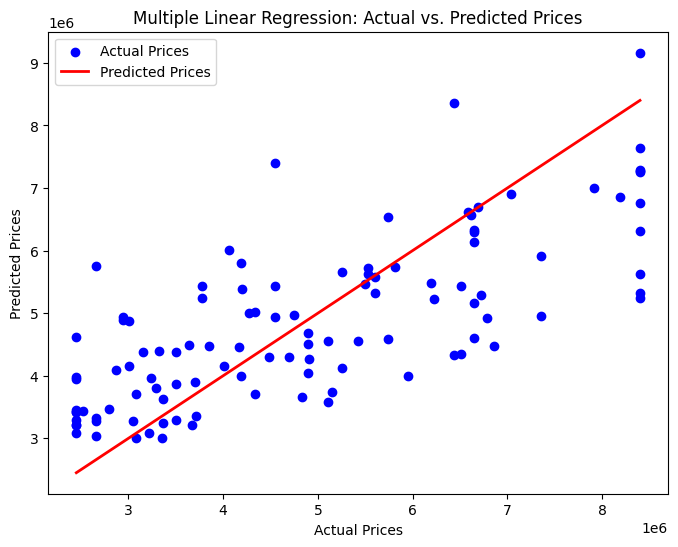

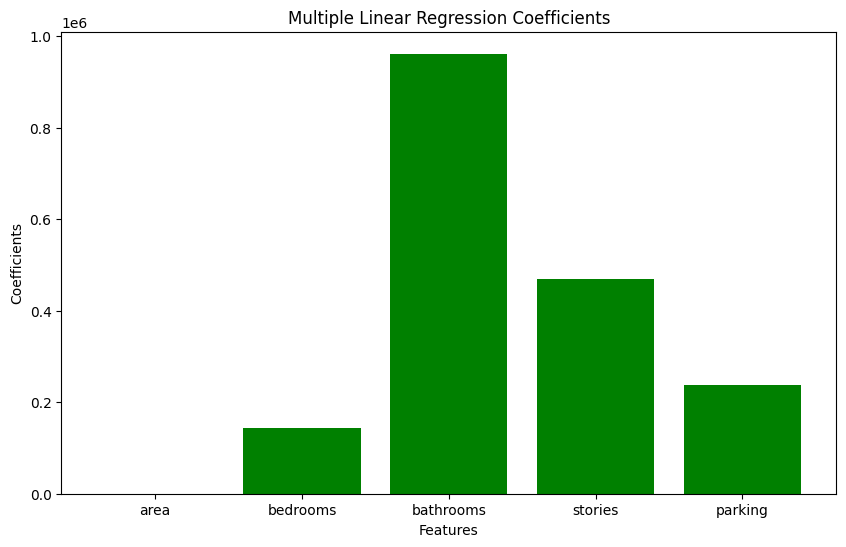

In [30]:
import matplotlib.pyplot as plt

# 1. Scatter plot for simple linear regression
plt.figure(figsize=(8, 6))
plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual Prices')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Actual vs. Predicted Prices')
plt.legend()
plt.show()

# 2. Scatter plot for multiple linear regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test_multiple, y_pred_multiple, color='blue', label='Actual Prices')
plt.plot([min(y_test_multiple), max(y_test_multiple)], [min(y_test_multiple), max(y_test_multiple)], color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Multiple Linear Regression: Actual vs. Predicted Prices')
plt.legend()
plt.show()

# 3. Bar chart for multiple linear regression coefficients
plt.figure(figsize=(10, 6))
coefficients = multiple_reg_model.coef_
features = X_multiple.columns
colors = ['green' if c > 0 else 'red' for c in coefficients]
plt.bar(features, coefficients, color=colors)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Multiple Linear Regression Coefficients')
plt.show()

## Summary:

### Q&A
No questions to answer.

### Data Analysis Key Findings
* **Data Cleaning:** Outliers in 'price' and 'area' columns were handled using winsorization, limiting extreme values to the top and bottom 5th percentile.
* **Model Evaluation:** Multiple linear regression significantly outperformed simple linear regression.  Multiple linear regression model achieved an R-squared of 0.55 compared to 0.29 for simple linear regression, indicating a better fit to the data.  The multiple linear regression model also exhibited lower MAE (986676.52) and MSE (1551579634487.13) compared to simple linear regression.
* **Feature Importance (Multiple Regression):** A bar chart visualization of coefficients revealed the relative importance of each feature in the multiple linear regression model.  The visualization helps to understand which features have the strongest positive or negative impacts on house prices.

### Insights or Next Steps
* **Feature Engineering:** Explore feature engineering techniques to potentially improve model performance.  Creating new features based on existing ones or interactions between them could better capture the underlying relationships in the data and improve predictive accuracy.
* **Model Tuning:**  Investigate different model parameters and regularization techniques to improve the multiple linear regression model.  Fine-tuning the model parameters could further optimize the model's fit to the data and enhance the prediction accuracy.
